# Parabolic properties

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, 'libraries')
import rc
import sections as sect
import materials as mat
import utils

In [2]:
# DEFINE PARABOLA Y

a=3
b=30
c=30
def fun(x):return a*x**2+b*x+c
def fun_tan(x):return (2*a*x+b,fun(x)-(2*a*x+b)*x)
print('y(x) = {0}x**2+{1}x+{2}'.format(a,b,c))

y(x) = 3x**2+30x+30


In [3]:
# Check the equation for a specific x (y and y')
x=-4

print('y({0}) = {1}'.format(x,fun(x)))
print('tangent line to parabola at x = {0}:'.format(x)) 
print('y(x) = {0}x+{1}'.format(fun_tan(x)[0],fun_tan(x)[1]))

y(-4) = -42
tangent line to parabola at x = -4:
y(x) = 6x+-18


In [4]:
# Test on points at x0 =-2 and x1 = -3

x0=-2
E0=fun_tan(x0)[0]
y0=fun(x0)
x1=-3
E1=fun_tan(x1)[0]
print('x0={}, E0={}, y0={}, x1={}, E1={}'.format(x0,E0,y0,x1,E1))

x0=-2, E0=18, y0=-18, x1=-3, E1=12


In [5]:
# Deriviation of a generalised equation

a=(E0-E1)/2/(x0-x1)
b=E0-2*a*x0
c=y0-a*x0**2-b*x0

y=a*x**2+b*x+c
y=(E0-E1)/2/(x0-x1)*x**2+(E0-2*(E0-E1)/2/(x0-x1)*x0)*x+y0-a*x0**2-(E0-2*(E0-E1)/2/(x0-x1)*x0)*x0
z=(E0-E1)/(x0-x1)
y=z/2*x**2+(E0-2*z/2*x0)*x+y0-(E0-E1)/2/(x0-x1)*x0**2-(E0-2*z/2*x0)*x0
y=z/2*x**2+(E0-z*x0)*x+y0-z/2*x0**2-(E0-z*x0)*x0
y=z/2*x**2+E0*x-z*x0*x+y0-z/2*x0**2-E0*x+z*x0*x0
y=z*(x**2/2-x0*x-x0**2/2+x0**2)+E0*(x-x0)+y0
y=(E0-E1)/(x0-x1)*(x**2/2-x0*x+x0**2/2)+E0*(x-x0)+y0
# y=x*((E0-E1)/(x0-x1)*(x/2-x0)+E0)+(E0-E1)/(x0-x1)*x0**2/2-E0*x0+y0
# y=x*((E0-E1)/(x0-x1)*(x/2-x0)+E0)+x0*((E0-E1)/(x0-x1)*x0/2-E0)+y0
y=(x-x0)**2*(E0-E1)/(2*(x0-x1))+E0*(x-x0)+y0
y

-42.0

In [6]:
# derivative equation a
y_der_a=2*(E0-E1)/(x0-x1)*x/2-(E0-E1)/(x0-x1)*x0+E0
y_der_a=(x*(E0-E1)+x0*E1-x1*E0)/(x0-x1)
y_der_a

# derivative equation b
y_der_b=(E0-E1)/(x0-x1)*(x**2/2-x0*x+x0**2/2)+E0*(x-x0)+y0-(x*(E0-E1)+x0*E1-x1*E0)/(x0-x1)*x
y_der_b=(x**2*(E1-E0)-x0**2*(E0+E1)+2*x0*x1*E0)/(2*(x0-x1))+y0

print('y(x) = {0}x+{1}'.format(y_der_a,y_der_b))
print('y(x) = {0}x+{1}'.format(fun_tan(x)[0],fun_tan(x)[1]))

y(x) = 6.0x+-18.0
y(x) = 6.0x+-18.0


In [7]:
# if E1 not known but secant line is
E1=2*a*x1+b
S=(fun(x1)-y0)/(x1-x0)
S=(E1+E0)/2
E1=2*S-E0
y=(x-x0)**2*(2*E0-2*S)/(2*(x0-x1))+E0*(x-x0)+y0
y

-42.0

In [8]:
#if x0=0 and E1=0
x0=0
E0=fun_tan(x0)[0]
y0=fun(x0)
x1=-5
E1=fun_tan(x1)[0]

y=x*(-E0/x1*x/2+E0)+y0
y

-42.0

In [26]:
# E1=2*S-E0
# S=(E1+E0)/2
def func_E1(x,E0,E1,x0,x1,y0,printing=True): 
    a=(E0-E1)/2/(x0-x1)
    b=E0-2*a*x0
    c=y0-a*x0**2-b*x0
    if printing: print('y(x) = {0}x**2+{1}x+{2}'.format(a,b,c))
    return (x-x0)**2*(E0-E1)/(2*(x0-x1))+E0*(x-x0)+y0
    
def func_S(x,S,E0,x0,x1,y0,printing=True): 
    a=(E0-(2*S-E0))/2/(x0-x1)
    b=E0-2*a*x0
    c=y0-a*x0**2-b*x0
    if printing: print('y(x) = {0}x**2+{1}x+{2}'.format(a,b,c))
    return (x-x0)**2*(E0-(2*S-E0))/(2*(x0-x1))+E0*(x-x0)+y0

def func_der(x,E0,E1,x0,x1,printing=True): 
    a=(x*(E0-E1)+x0*E1-x1*E0)/(x0-x1)
    b=(x**2*(E1-E0)-x0**2*(E0+E1)+2*x0*x1*E0)/(2*(x0-x1))+y0
    if printing: print('y(x) = {0}x+{1}'.format(a,b))
    return (a,b)

fun_E1=func_E1(x,E0,E1,x0,x1,y0,printing=True)
fun_S=func_S(x,S,E0,x0,x1,y0,printing=True)
fun_der=func_der(x,E0,E1,x0,x1,printing=False)
print(fun_E1,fun_S)

y(x) = 3.0x**2+30.0x+30.0
y(x) = -3.0x**2+6.0x+6.0
35.08333333333333 6.916666666666668


y(x) = 3x**2+30x+30
func_E1
y(x) = 3.0x**2+30.0x+30.0
func_S
y(x) = -3.0x**2+6.0x+6.0


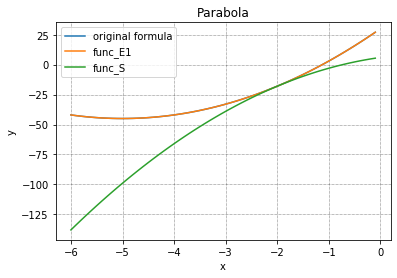

In [25]:


def plotting(x_range,title='Parabola',xlim=(None,None),ylim=(None,None),step_size=1):
    fig,ax = utils.plotBase()
    x_range=np.arange(x_range[0],x_range[1],step_size)
    ax.plot(x_range,[fun(i) for i in x_range],label='original formula')
    ax.plot(x_range,[func_E1(i,E0,E1,x0,x1,y0,printing=False) for i in x_range],label='func_E1')
    print('func_E1')
    ss=func_E1(x_range[0],E0,E1,x0,x1,y0,printing=True)
    ax.plot(x_range,[func_S(i,S,E0,x0,x1,y0,printing=False) for i in x_range],label='func_S')
    print('func_S')
    ss=func_S(x_range[0],S,E0,x0,x1,y0,printing=True)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.legend()
    plt.show()

a=3
b=30
c=30
def fun(x):return a*x**2+b*x+c
def fun_tan(x):return (2*a*x+b,fun(x)-(2*a*x+b)*x)
print('y(x) = {0}x**2+{1}x+{2}'.format(a,b,c))

x_range=[-6,0]   

x0=-2
E0=fun_tan(x0)[0]
y0=fun(x0)
x1=-3
E1=fun_tan(x1)[0]
S=(E1+E0/2)

plotting(x_range,step_size=0.1)

In [11]:
x=1/(2*a)
x

0.16666666666666666

y(x) = 4688762.953367874x**2+9642.30310880829x+5.721558186528498
func_E1
y(x) = 4688762.953367874x**2+9642.303108807653x+5.721558187156916
func_S
y(x) = 18750230.661917098x**2+56255513.13730571x+56245876.55575509


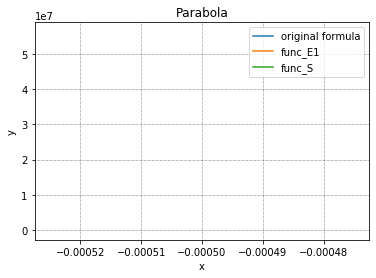

In [12]:
#y(x) = 4688762.953367874x**2+-9642.30310880829x+5.721558186528498
#y(x) = -8517.0x+1.02204

a=4688762.953367874
b=9642.30310880829
c=5.721558186528498
def fun(x):return a*x**2+b*x+c
def fun_tan(x):return (2*a*x+b,fun(x)-(2*a*x+b)*x)
print('y(x) = {0}x**2+{1}x+{2}'.format(a,b,c))

x_range=[-0.0005,0.002]  

x0=-2
E0=fun_tan(x0)[0]
y0=fun(x0)
x1=-3
E1=fun_tan(x1)[0]
S=(E1+E0/2)

plotting(x_range)

## con1